# Optimizing Hyperparameters - Random Forest for Heathrow 

# Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [3]:
# Set a path

path = r'/Users/roxanamiu/Documents/Climate Change project 2'

In [4]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path, 'Prepared', 'X_cleaned_date.csv'), index_col = False)

In [5]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, 'Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [6]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [7]:
X.shape

(22950, 137)

In [8]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
answers.shape

(22950, 16)

# Data Wrangling

In [10]:
# Create a list of the columns containing "Heathrow" in their names

heathrow_list = list(x for x in X.columns if x.find('HEATHROW') >=0)
heathrow_list

['HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max']

In [11]:
# Create a dataframe with those columns

df_heathrow = X[heathrow_list]
df_heathrow

,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max
0,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3
1,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6
2,8,0.96,1.0166,0.15,0.07,0.1,8.4,6.1,12.2
3,8,0.98,1.0230,0.13,0.00,0.0,9.4,6.7,8.9
4,5,0.84,1.0275,0.30,0.00,2.1,8.9,8.9,7.2
...,...,...,...,...,...,...,...,...,...
22945,5,0.87,1.0140,1.18,0.16,1.9,16.4,11.9,18.9
22946,4,0.82,1.0152,1.18,0.16,4.2,15.8,12.7,21.8
22947,7,0.85,1.0138,1.18,0.16,4.2,16.5,11.2,17.0
22948,5,0.86,1.0147,1.18,0.16,0.6,15.2,13.4,17.5


In [12]:
# Reduce answers dataset to Heathrow's answers only

answers_heathrow = answers['HEATHROW_pleasant_weather']
answers_heathrow

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: HEATHROW_pleasant_weather, Length: 22950, dtype: int64

In [13]:
df_heathrow.shape # observations dataset has the correct shape

(22950, 9)

In [14]:
answers_heathrow.shape # predictions dataset has the correct shape

(22950,)

# Reshaping for Modeling

In [15]:
X2 = df_heathrow

In [16]:
y2 = answers_heathrow

In [17]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [18]:
X.shape

(22950, 9)

In [19]:
y.shape

(22950,)

# Data Split 

In [20]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [22]:
X_train

array([[ 7.    ,  0.77  ,  1.0144, ..., 15.8   , 12.5   , 20.3   ],
       [ 3.    ,  0.71  ,  1.0171, ...,  1.3   , -2.7   ,  7.    ],
       [ 3.    ,  0.81  ,  1.0116, ..., -2.8   , -5.7   ,  0.8   ],
       ...,
       [ 8.    ,  0.9   ,  1.0115, ...,  8.3   ,  6.8   , 12.4   ],
       [ 6.    ,  0.83  ,  1.0121, ..., 11.6   ,  8.1   , 16.8   ],
       [ 2.    ,  0.59  ,  1.0257, ...,  9.2   ,  4.2   , 11.8   ]])

In [23]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
X_test

array([[ 3.    ,  0.61  ,  1.0171, ..., 13.6   ,  8.2   , 18.1   ],
       [ 7.    ,  0.88  ,  0.9977, ...,  5.9   ,  0.8   , 11.1   ],
       [ 7.    ,  0.7   ,  1.0043, ..., 19.4   , 14.6   , 24.6   ],
       ...,
       [ 6.    ,  0.85  ,  1.0095, ..., 15.4   , 12.1   , 21.7   ],
       [ 5.    ,  0.72  ,  1.0264, ...,  8.7   ,  2.9   , 15.    ],
       [ 4.    ,  0.58  ,  1.022 , ..., 14.2   ,  9.9   , 18.6   ]])

In [25]:
y_test

array([1, 0, 1, ..., 0, 0, 0])

# Hyperparameter Optimization

### Grid Search

In [26]:
# Create a RF classifier

clf = RandomForestClassifier()

In [27]:
# Grid search cv
grid_space={'max_depth':[3,5,7,None],
              'n_estimators':[10,50,200],
              'max_features':[15,50,400],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [28]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Search took 0.7884043534596761 minutes


[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=

Search took 3.760380200544993 minutes


In [29]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


# Random Search

In [30]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [31]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [32]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=1.000 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=1.000 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=1.000 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=1.000 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3]

[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=None, max_features=5, min_sample

Search took 6.360676312446595 minutes


In [33]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 310}
Best RANDOM search score is: 1.0


In [34]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 310}
Best RANDOM search score is: 1.0


# Running Random Forest with Optimized Search Parameters

In [35]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 110, max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=4, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=60, max_features=6, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=110)

In [36]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


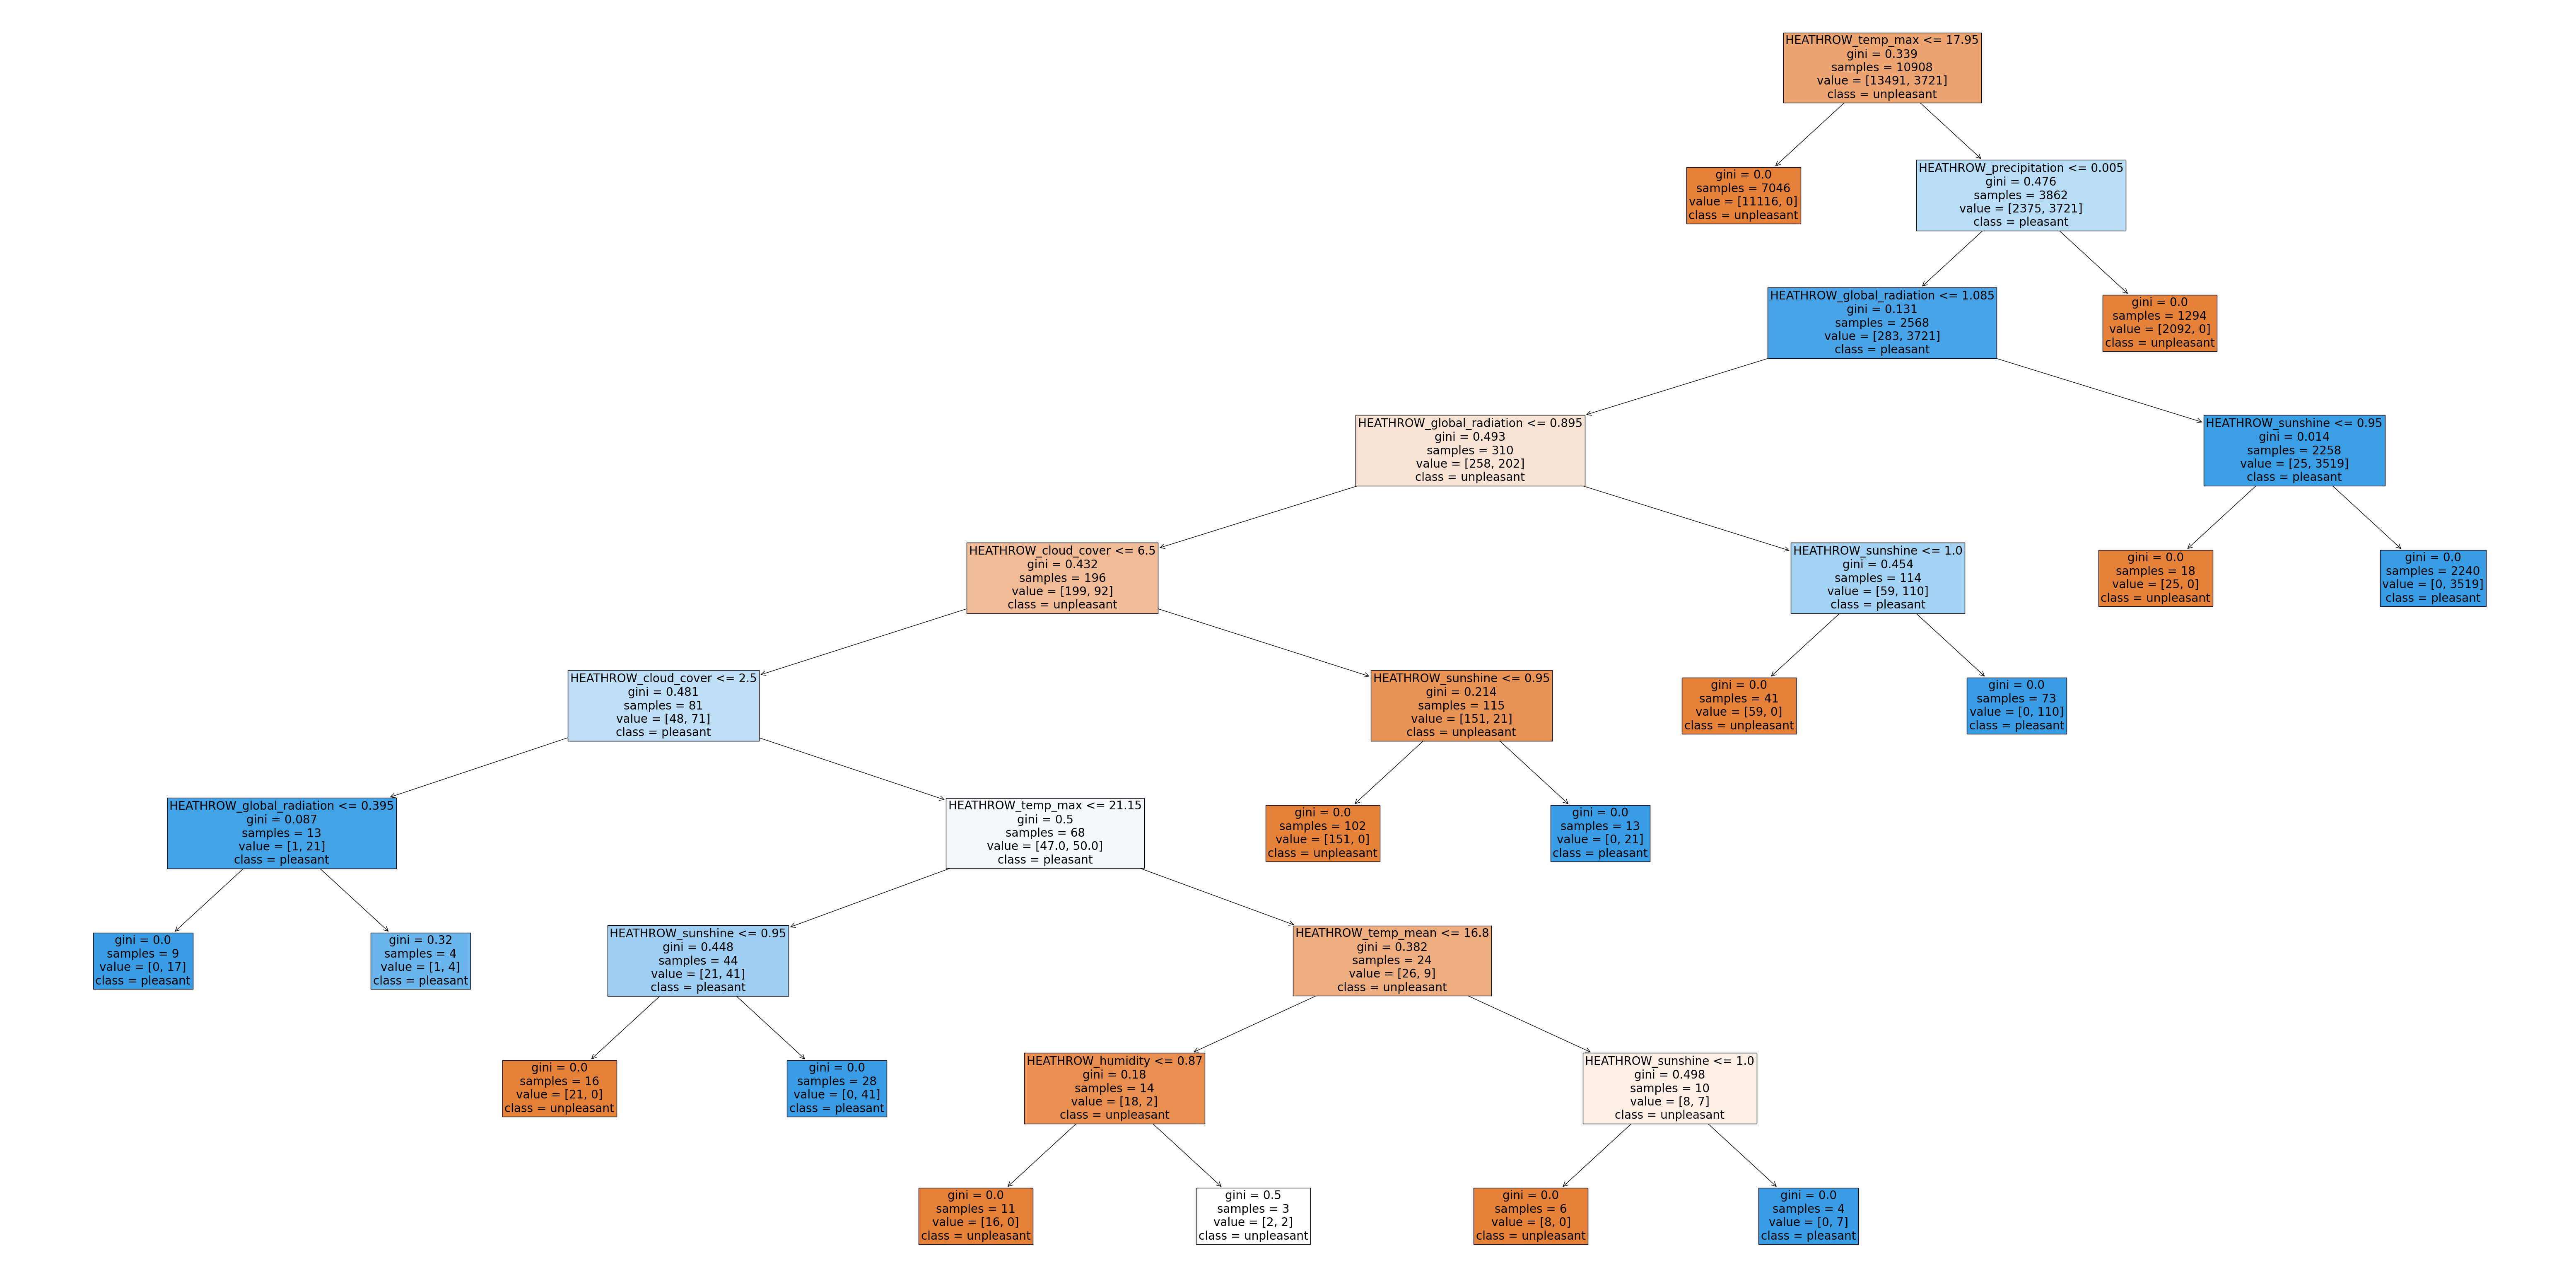

In [37]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[6], fontsize = 20, feature_names = df_heathrow.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [38]:
fig.savefig(os.path.join(path, 'Visualizations', 'optimized_random_forest_Heathrow.png'),bbox_inches='tight')

# Uncovering Feature Importances

In [39]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.00382033, 0.0125044 , 0.00742373, 0.04210571, 0.36279176,
       0.08320896, 0.06924704, 0.00107211, 0.41782597])

In [40]:
# Create a list of weather features

wx_list = [feature.replace('HEATHROW_', '') for feature in heathrow_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [41]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.003820
humidity            0.012504
pressure            0.007424
global_radiation    0.042106
precipitation       0.362792
sunshine            0.083209
temp_mean           0.069247
temp_min            0.001072
temp_max            0.417826
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


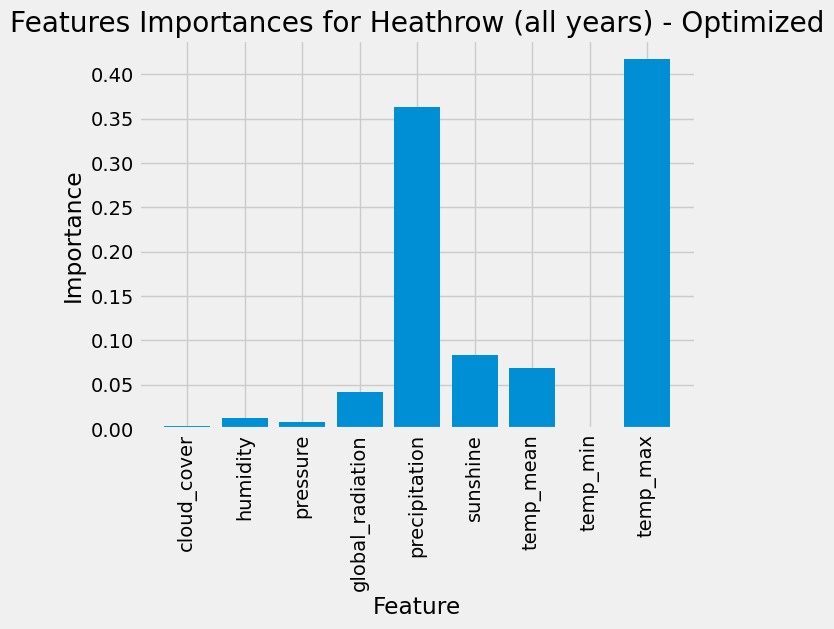

[CV 3/3] END max_depth=None, max_features=50, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=50, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=1.000 total time=   0.3s
[CV 3/3] END max_depth=None, max_features=50, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=1.000 total time=   0.3s
[CV 2/3] END max_depth=None, max_features=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=1.000 total time=   0.3s
[CV 1/3] END max_depth=None, max_features=50, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.4s
[CV 1/3] END max_depth=None, max_features=50, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=50, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=50, m

In [42]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Heathrow (all years) - Optimized');

plt.savefig(os.path.join(path, 'Visualizations', 'Heathrow_feature_importances_optimized.png'), bbox_inches='tight')
plt.show()